,ycol,channel_name,mse_tr,mse_cv,mse_te
name,,,,,
base-simple,gDA,gDA_0,0.772118,0.777114,0.782540
no-CI,gDA,gDA_1,0.777749,0.772195,0.788134
no-CO,gDA,gDA_2,0.772335,0.771026,0.782630
no-SI,gDA,gDA_3,0.788640,0.785340,0.801297
no-SIr,gDA,gDA_4,0.816932,0.808949,0.828151
no-SO,gDA,gDA_5,0.775658,0.781051,0.786404
no-sl,gDA,gDA_6,0.773024,0.778619,0.783816
no-spnnrOff,gDA,gDA_7,0.773095,0.777562,0.783464
base-words,gDA,gDA_8,0.763717,0.761975,0.775024


0 base
1 no-CI
2 no-SO
3 no-CI-no-SO
4 words-no-CI-no-SO


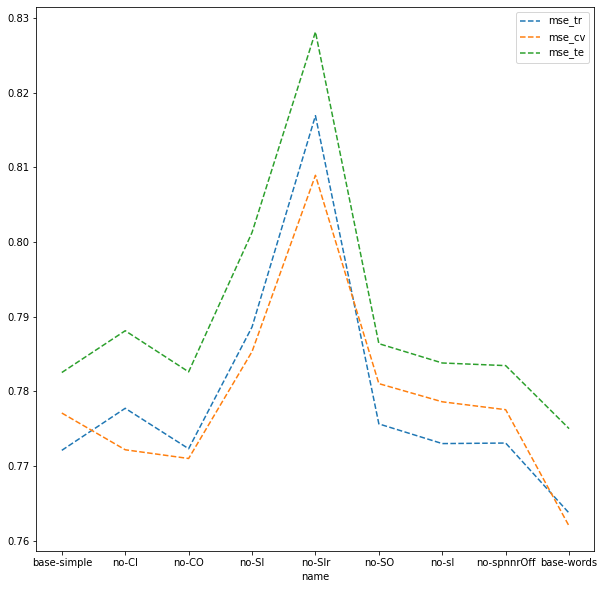

In [23]:

import time
import glob
import numpy as np
import pandas as pd
import numpy as np
from sglm.features import gen_signal_df as gsd
from sglm.features import build_features as bf
from sglm.features import setup_model_fit as smf
from sglm.models import sglm_cv
from sglm import models
from sglm.visualization import visualize
from sglm.models import train_model
from sglm.models import eval
from sglm import features
import matplotlib.pyplot as plt

# for i in range(3):
for i in [0]:
    base_fold = f'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs/fig1/all/only-all-cont_{i}-ft/reports/coeffs/best_combined_coeffs'
    viz_df = pd.read_csv(base_fold + '/best_coeffs_combo.csv')
    viz_df['ycol'] = viz_df['channel_name'].str.split('_').apply(lambda x: x[0])

    for ycol_val in viz_df['ycol'].unique(): 
        fig,ax = plt.subplots(1,1,figsize=(10,10))
        tmp_viz_df = viz_df[viz_df['ycol'] == ycol_val].reset_index(drop=True).copy()

  
#         tmp_viz_df2 = tmp_viz_df[tmp_viz_df['mouse_id'].str.contains('WT')][['ycol', 'channel_name', 'name', 'mse_tr', 'mse_cv', 'mse_te']].groupby(['ycol', 'channel_name', 'name'])
#         tmp_viz_df2 = tmp_viz_df2.agg([lambda x: x.mean() - 2*x.std(), lambda x: x.mean(), lambda x: x.mean() + 2*x.std(), ]).copy()
#         tmp_viz_df2.columns = ['mse_tr_lb_bymouse', 'mse_tr_mn_bymouse', 'mse_tr_ub_bymouse',
#                                'mse_cv_lb_bymouse', 'mse_cv_mn_bymouse', 'mse_cv_ub_bymouse',
#                                'mse_te_lb_bymouse', 'mse_te_mn_bymouse', 'mse_te_ub_bymouse',]

#         lbc = [_ for _ in tmp_viz_df2.columns if '_lb' in _]
#         mc = [_ for _ in tmp_viz_df2.columns if '_mn' in _]
#         ubc = [_ for _ in tmp_viz_df2.columns if '_ub' in _]
#         tmp_viz_df2 = tmp_viz_df2[lbc + mc + ubc].reset_index().set_index('name')
#         # viz_df = viz_df[~viz_df['mouse_id'].str.contains('W')][['channel_name', 'mse_tr', 'mse_cv', 'mse_te']].reset_index(drop=True)

#         tmp_viz_df2.plot(ax=ax,title=ycol_val) #, 'r2_tr', 'r2_cv', 'r2_te']
#         # display(tmp_viz_df2)

        tmp_viz_df3 = tmp_viz_df[~tmp_viz_df['mouse_id'].str.contains('WT')][['ycol', 'channel_name', 'name', 'mse_tr', 'mse_cv', 'mse_te']].groupby(['ycol', 'channel_name', 'name']).mean().copy()
        tmp_viz_df3.columns = ['mse_tr', 'mse_cv', 'mse_te']
        tmp_viz_df3 = tmp_viz_df3.reset_index().set_index('name')
        tmp_viz_df3.plot(ax=ax, style='--')
        display(tmp_viz_df3)

        # break
        for iname, name in enumerate([
            'base',
            'no-CI',
            'no-SO',
            'no-CI-no-SO',
            'words-no-CI-no-SO'
        ]):
            print(iname, name)
        
        # display(tmp_viz_df)
        # for mouse_id in tmp_viz_df['mouse_id'].unique():    
        #     tmp_viz_df2 = tmp_viz_df[tmp_viz_df['mouse_id'] == mouse_id][['ycol', 'channel_name', 'mse_tr', 'mse_cv', 'mse_te']].copy()
        #     # viz_df = viz_df[~viz_df['mouse_id'].str.contains('W')][['channel_name', 'mse_tr', 'mse_cv', 'mse_te']].reset_index(drop=True)

        #     tmp_viz_df2.plot() #, 'r2_tr', 'r2_cv', 'r2_te']
        #     for iname, name in enumerate([
        #         'base',
        #         'no-CI',
        #         'no-SO',
        #         'no-CI-no-SO',
        #         'words-no-CI-no-SO'
        #     ]):
        #         print(iname, name)
            
        #     display(tmp_viz_df)